
<center><h2>Topic: Image Classification using CNN </h2></center>





# Importing the libraries of machine learning and deep learning

In [ ]:
import numpy as np
import os
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import warnings
warnings.filterwarnings('ignore')

•	**numpy** is a library for working with arrays and numerical operations.

•	**os** is a built-in library for interacting with the operating system.  

•	**tensorflow.keras** is a high-level API for building and training deep learning models. It includes several modules such as models, layers, preprocessing, and preprocessing.image which are being imported in this code snippet.  

•	**ImageDataGenerator** is a class from the tensorflow.keras.preprocessing.image module that is used to generate batches of tensor image data with real-time data augmentation.  

•**img_to_array** is a function from the tensorflow.keras.preprocessing.image module that converts a PIL Image instance to a Numpy array.  

•	**tensorflow** is an open-source library for machine learning and deep learning.  

•	**matplotlib.pyplot** is a library for creating visualizations such as plots, histograms, etc.  

•	**backend** is a module from the tensorflow.keras library that provides an interface to the underlying computational backend.


In [ ]:
INIT_LR = 1e-3
BATCH_SIZE = 32
EPOCHS = 50
IMAGE_SIZE = 256
default_image_size = tuple((IMAGE_SIZE, IMAGE_SIZE))
image_size = 0
data_dir = "D:\\Christ\\tri 5\\NN & DL\\PlantVillage"
CHANNELS=3
AUTOTUNE = tf.data.AUTOTUNE

<p>This code sets several variables that are used in a machine learning model.</p>

<p>INIT_LR is the initial learning rate for the model's optimizer.</p>
<p>BATCH_SIZE is the number of samples to use in each iteration of training.</p>
<p>EPOCHS is the number of times the model will cycle through the entire dataset during training.</p>
<p>IMAGE_SIZE is the size (height and width) to which the images will be resized.</p>
<p>default_image_size is a tuple consisting of (IMAGE_SIZE, IMAGE_SIZE)</p>
<p>data_dir is the directory where the dataset is stored.</p>
<p>CHANNELS is the number of channels in the image (3 for RGB images)</p>
<p>AUTOTUNE is a TensorFlow variable that is used to optimize loading data into memory.</p>

In [ ]:
def get_data_partitions_tf(data, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = data.cardinality().numpy()
    
    if shuffle:
        data = data.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = data.take(train_size)    
    val_ds = data.skip(train_size).take(val_size)
    test_ds = data.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

This is a function that takes in a dataset (data), as well as train_split, val_split, and test_split values, which represent the proportion of the dataset to be split into the training, validation, and test sets, respectively. The function also takes in a boolean value for shuffle, which indicates whether the data should be shuffled before being split, and a shuffle_size parameter, which determines the number of elements to shuffle at a time.    

The function starts by asserting that the sum of the split values equals 1, to ensure that the entire dataset is being split. It then calculates the total size of the dataset using the cardinality() method and stores it in the variable ds_size. If the shuffle parameter is set to True, the function shuffles the data using the shuffle() method, with the shuffle size being determined by the shuffle_size parameter.    

Next, the function calculates the sizes of the training, validation and test sets as a proportion of the total dataset size. It then creates the train_ds, val_ds, and test_ds datasets by taking and skipping the appropriate number of elements from the original dataset. Finally, the function returns the three datasets as a tuple (train_ds, val_ds, test_ds).


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  seed=123,
  shuffle=True,
  image_size=default_image_size,
  batch_size=BATCH_SIZE
)


train_ds, val_ds, test_ds = get_data_partitions_tf(dataset)

Found 3901 files belonging to 2 classes.


Creating a dataset from a directory of images and then partitioning the dataset into training, validation, and test sets.  

The first line of code uses the image_dataset_from_directory method from the tf.keras.preprocessing module to create a dataset from the images in a directory specified by the data_dir variable. The method also takes several other parameters:  

•	seed is used to initialize the random number generator for shuffling the data.
•	shuffle is a boolean value that indicates whether the data should be shuffled before being loaded.
•	image_size is used to resize the images to a specific size.
•	batch_size is used to specify the number of images to be loaded in each batch.


**get_data_partitions_tf function** , passing in the dataset created above as an argument, and assigns the returned tuple to the variables train_ds, val_ds, and test_ds. The function will divide the dataset into three sets: a training set, a validation set, and a test set using the **train_split, val_split, and test_split** values respectively.

In [ ]:
class_names = dataset.class_names
n_classes = len(class_names)
print(n_classes, class_names)

2 ['Pepper___bell___Bacterial_spot', 'Pepper___bell___healthy']


Printing the number of classes and the class names for the images in the dataset.

The first line of code assigns the value of the class_names attribute of the dataset to the variable class_names. class_names is a list of strings that contains the names of the classes present in the dataset.   

The next line of code uses the len() function to find the number of classes present in the dataset, and assigns the result to the variable n_classes.
Finally, the code prints the number of classes and the class names. The class_names are the names of the folders where the images are saved and the number of classes is the number of folders.


**Following displaying 9 images from the training set along with their class labels.**

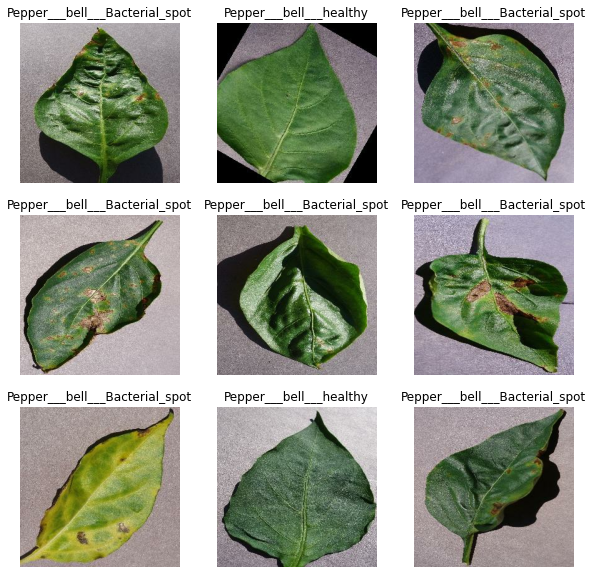

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

First, the code uses the figure() method from the matplotlib.pyplot library to create a new figure with a specified size.  

Next, the code uses a nested for loop to iterate over the images and labels in the train_ds dataset. The outer for loop iterates over the batches of images and labels, using the take(1) method to only take the first batch.  

The inner for loop iterates over the first 9 images in the batch. For each image, the code uses the subplot() method to create a subplot within the figure, specifying the number of rows, columns and the position of the subplot.  

The imshow() method is then used to display the image, converting the image to a numpy array with astype(uint8) and passing it as an argument. The code also uses the title() method to display the class label of the image, which is found by looking up the label index in the class_names list.  

Finally, the axis("off") method is used to remove the axis labels and ticks from the subplot.


**Folllowing is printing the shape of the images and labels in the training dataset.**

In [ ]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)
(32,)


The code uses a for loop to iterate over the batches of images and labels in the train_ds dataset. For each batch, it prints the shape of the image_batch and labels_batch using the shape attribute of the tensors.   

The shape of the image_batch will be (batch_size, height, width, channels) where batch_size is the number of images in the batch, height and width are the dimensions of the images and channels represent the number of color channels in the image. The shape of the labels_batch will be (batch_size, ) where batch_size is the number of images in the batch. The loop is then broken with the break statement, which is used to exit the loop after the first iteration.

**Following is preparing the training, validation, and test datasets for use in training a model.**

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

For each dataset (train_ds, val_ds, test_ds), the code is applying several methods to improve the performance and efficiency of training:  

•**cache()** method is used to cache the dataset in memory, so that it can be reused multiple times without having to be recomputed. This speeds up the training process.  

•	**shuffle(1000)** method is used to shuffle the dataset with a buffer size of 1000, so that the elements in the dataset are rearranged randomly. This helps to introduce randomness and improve the generalization of the model.  

•	**prefetch(buffer_size=AUTOTUNE)** method is used to load the data asynchronously in advance, so that the data is ready and available to the model when it needs it. The buffer_size argument is used to specify the number of elements to prefetch, with AUTOTUNE indicating that the optimal buffer size should be used. This can help to improve the performance of the model.


By applying these methods, the data is ready for the training, validation and testing in a more efficient manner.

**Following creates a Sequential model that contains two preprocessing layers: Resizing and Rescaling.**

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

The **Sequential model** is a linear stack of layers, where you can add one layer at a time. The first layer added will be the first layer in the model, the second layer added will be the second layer in the model and so on. This Sequential model can be used to process the images in the dataset by calling the resize_and_rescale(image) which will resize and rescale the images.

•	The **Resizing layer** is used to resize the images to a specific size. The IMAGE_SIZE variable is passed as an argument to set the new size of the images.  

•	The **Rescaling layer** is used to rescale the pixel values of the images by a certain factor. The argument passed to this layer is 1./255, which means that the pixel values will be divided by 255. This is a common preprocessing step for image data, as it helps to standardize the pixel values of the images to a range between 0 and 1.


**Defining the input shape of the model and the dimension of the channel.**

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

This code creates a data augmentation pipeline using the Keras Sequential API. The pipeline contains two layers:

RandomFlip: This layer randomly flips the input image horizontally and vertically with a probability of 0.5.

RandomRotation: This layer randomly rotates the input image by an angle between -0.2 and 0.2 radians.

These layers are used to artificially expand the dataset by creating new images from the existing ones. This helps to make the model more robust and less prone to overfitting.

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
batch_input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
chanDim = -1
if K.image_data_format() == "channels_first":
    input_shape = (CHANNELS, IMAGE_SIZE, IMAGE_SIZE)
    batch_input_shape = (BATCH_SIZE, CHANNELS, IMAGE_SIZE, IMAGE_SIZE)
    chanDim = 1

The **input_shape** variable is a tuple that defines the shape of the input data that the model will receive. It consists of the image height and width (IMAGE_SIZE, IMAGE_SIZE) and the number of channels (CHANNELS). The batch_input_shape variable is a tuple that represents the input shape of one batch of data, and it includes the batch size (BATCH_SIZE) in addition to the input shape.   

The **chanDim variable** is used to specify the channel dimension of the input data. It is set to -1 by default, which means that the channel dimension is the last one. But it can change depending on the image data format used by the model.  

The **K.image_data_format()** is a function from the backend module in Keras that returns the format of the image data. It can be either "channels_first" or "channels_last", depending on the configuration of the Keras backend. If the image data format is "channels_first", the input_shape and batch_input_shape variables are updated to match this format. In this case, the channel dimension is set to 1. This way, the model can be trained with image data in either format.


**Applying data augmentation to the training dataset, specifically to the images.**

Data augmentation is a technique used to artificially increase the size of a dataset by applying random modifications to the existing data. This can be useful to prevent overfitting and improve the generalization of the model by providing more diverse examples to learn from. The modifications applied can include random cropping, flipping, rotation, and scaling. By applying data augmentation to the training dataset, the model will be exposed to a wider variety of images, which can help it to generalize better to new unseen images during the testing phase.

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


The map() method is used to apply a function to each element in the dataset. In this case, the function is data_augmentation(x, training=True), which applies data augmentation to the images in the dataset. The second argument y is the label and passed through unmodified. The prefetch() method is used again to load the data asynchronously in advance so that the data is ready and available to the model when it needs it.

**Defining a convolutional neural network (CNN) model using the Sequential API from the tensorflow.keras.models module.**

In [ ]:
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=batch_input_shape)

The model is a stack of several layers, where each layer is added to the model one at a time. The first layer is the resize_and_rescale model created earlier. Then, several Conv2D layers are added to the model. Conv2D layer is a 2D convolution layer which applies a set of filters to the input image. Each filter slides over the input image, performs a dot product with the region it is currently on, and outputs a new 2D matrix. The kernel_size parameter is set to (3,3) that means the filters are 3x3. The activation function used is 'relu' which means rectified linear unit. The input_shape parameter is set to input_shape that is defined previously.   

After each Conv2D layer, a MaxPooling2D layer is added. Max pooling is a down-sampling operation that reduces the spatial dimensions of the output of the convolutional layer. The kernel_size parameter is set to (2,2) which means that the pooling is done over a 2x2 window. The max pooling operation is applied to each channel separately.    

After the Conv2D and MaxPooling2D layers, a Flatten layer is added. The flatten layer is used to reshape the multi-dimensional input tensor into a one-dimensional vector.   

Finally, the model has two dense layers, also known as fully connected layers. The first dense layer has 64 neurons and the activation function is set to 'relu'. The second dense layer is the output layer and has n_classes neurons and the activation function is set to 'softmax'. This activation function is commonly used in the output layer of a multi-class classification problem.


The **build(input_shape=batch_input_shape)** method is used to finalize the model's architecture and to prepare the model for training.

**The summary() method is used to display a summary of the model's architecture. It shows the layers, their output shapes, the number of parameters, and the number of computations required.**

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (32, 60, 60, 64)         

This method is useful for understanding the overall structure of the model, the number of parameters it has, and how the different layers are connected. It can also help in identifying potential issues, such as large numbers of parameters, which could make the model prone to overfitting.
The summary would show the details of each layer in the model, including the output shape of each layer, the number of parameters in each layer, and the number of computations required to process one batch of data. It also shows the total number of parameters in the model, which can give you an idea of the model's complexity.


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

The **compile()** method is used to configure the model's learning process before training. It is used to specify the optimizer, loss function, and metrics used to evaluate the model.  

The **optimizer parameter** is set to 'adam' which is an optimizer that can be used to update the model's weights based on the gradients of the loss function. The Adam optimizer is generally a good choice for many types of problems and is known to converge quickly.  

The **loss parameter** is set to 'SparseCategoricalCrossentropy' which is a loss function used for multi-class classification problems. The from_logits parameter is set to False, which means that the model's output is passed through a softmax activation function before being used to compute the loss.  

The** SparseCategoricalCrossentropy loss function** is the recommended loss function for multi-class classification problems with integer labels.
The metrics parameter is set to 'accuracy', which is used to measure the model's performance during training and evaluation. This metric calculates the percentage of correctly classified images.   

By using the compile() **method**, the model is configured and ready to train. Once the model is compiled, the model is ready to be trained with model.fit() method.


In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
97/97 [==============================] - 79s 795ms/step - loss: 0.5040 - accuracy: 0.7394 - val_loss: 0.4926 - val_accuracy: 0.8110
Epoch 2/50
97/97 [==============================] - 74s 759ms/step - loss: 0.2529 - accuracy: 0.9097 - val_loss: 0.1400 - val_accuracy: 0.9606
Epoch 3/50
97/97 [==============================] - 73s 756ms/step - loss: 0.1177 - accuracy: 0.9626 - val_loss: 0.2714 - val_accuracy: 0.8871
Epoch 4/50
97/97 [==============================] - 72s 746ms/step - loss: 0.0598 - accuracy: 0.9823 - val_loss: 0.0811 - val_accuracy: 0.9843
Epoch 5/50
97/97 [==============================] - 73s 755ms/step - loss: 0.0515 - accuracy: 0.9845 - val_loss: 0.0538 - val_accuracy: 0.9869
Epoch 6/50
97/97 [==============================] - 75s 770ms/step - loss: 0.0738 - accuracy: 0.9803 - val_loss: 0.0427 - val_accuracy: 0.9921
Epoch 7/50
97/97 [==============================] - 73s 757ms/step - loss: 0.0312 - accuracy: 0.9906 - val_loss: 0.0466 - val_accuracy: 0.9764

The **fit() method** is used to train the model on the dataset. This method takes several arguments to configure the training process:


•	train_ds is the training dataset.

•	batch_size is the number of samples per gradient update. The BATCH_SIZE variable is passed as an argument.

•	validation_data is the validation dataset. It is used to measure the model's performance during training.

•	verbose is an integer that controls the verbosity of the training process. If set to 1, it will output the progress bar, if set to 0, it will not.

•	epochs is the number of times the model will cycle through the data.


By calling the **fit() method**, the model starts training on the dataset, and the training progress can be observed with the help of the metrics such as accuracy, loss, validation accuracy and validation loss, etc. and it can be used to evaluate the performance of the model.

**Plot the training and validation accuracy and loss over the number of epochs.**

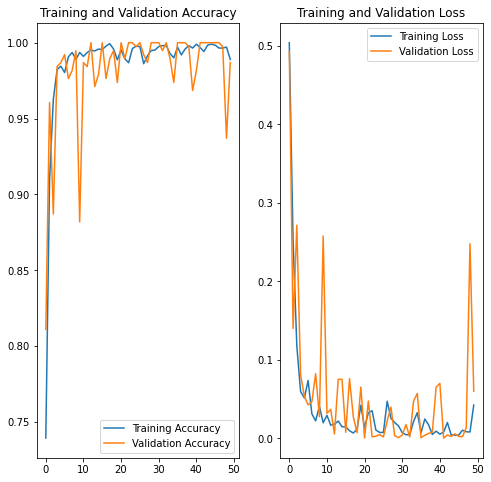

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The **acc, val_acc, loss, and val_loss variables** are assigned the training and validation accuracy and loss values stored in the history object returned by the fit() method.  

The **epochs_range variable** is assigned the range of the number of epochs.
Two subplots are created using the plt.subplot() method. The first subplot is for the accuracy, and the second subplot is for the loss. The plt.plot() method is used to plot the training and validation accuracy and loss for the corresponding subplots.  

The **plt.legend()** method is used to add a legend to the plot to identify the training and validation lines, and the plt.title() method is used to add a title to the plot.  

The **plt.show()** function is used to display the plot.  

Plotting the training and validation accuracy and loss over the number of epochs can help to understand how well the model is learning, and when it starts to overfit or underfit. It is generally a good practice to monitor the training and validation accuracy and loss plots during the model training process to identify potential issues in the model's learning process.


**To save the trained model to disk**

In [ ]:
import os
model_version = max([int(i) for i in (os.listdir("D:\\Christ\\tri 5\\NN & DL\\models")+[0])]) + 1
model.save(f"D:/Christ/tri 5/NN & DL/models{model_version}")

INFO:tensorflow:Assets written to: D:/Christ/tri 5/NN & DL/models1\assets


INFO:tensorflow:Assets written to: D:/Christ/tri 5/NN & DL/models1\assets


The **save() method** is used to save the model to disk. It takes a single argument, which is the path and filename of the model file to be saved.
The model_version variable is assigned the next version number of the model. This is done by first getting a list of all the files in the "../models" directory using os.listdir("../models") and then using list comprehension to extract all the integers from the file names and find the maximum of them. By adding 1 to this max value, the next version number is obtained.   

The model is then saved to the specified file path with the model.save(f"../models/{model_version}") statement. The model can later be loaded and used to make predictions on new data.  

Saving the model is important as it allows us to use the trained model later on without needing to retrain it, which can save time and computational resources. It also allows us to share the model with others so that they can use it as well.


**Defines a function predict(model, img) that takes in a trained model and an image as input and returns the predicted class and the confidence level of the prediction.**

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

The function first converts the input image to a numpy array using the img_to_array() function from the tf.keras.preprocessing.image module. Then, it adds a batch dimension to the image array using tf.expand_dims(img_array, 0). The batch dimension is necessary as the model expects a batch of images as input.  

Then, the function uses the predict() method of the model to get the predictions for the image. The predict() method returns an array of predictions, where each element in the array represents the predicted probability of the image belonging to each class.  

The function then uses the np.argmax() function to get the index of the class with the highest predicted probability. It uses this index to get the corresponding class name from the class_names list. The function also uses the np.max() function to get the highest predicted probability and rounds it to 2 decimal places to get the confidence level.   

Finally, the function returns the predicted class and the confidence level as a tuple


**To visualize the predictions made by the model on a batch of images from the test dataset.**

1/1 [==============================] - 0s 27ms/step


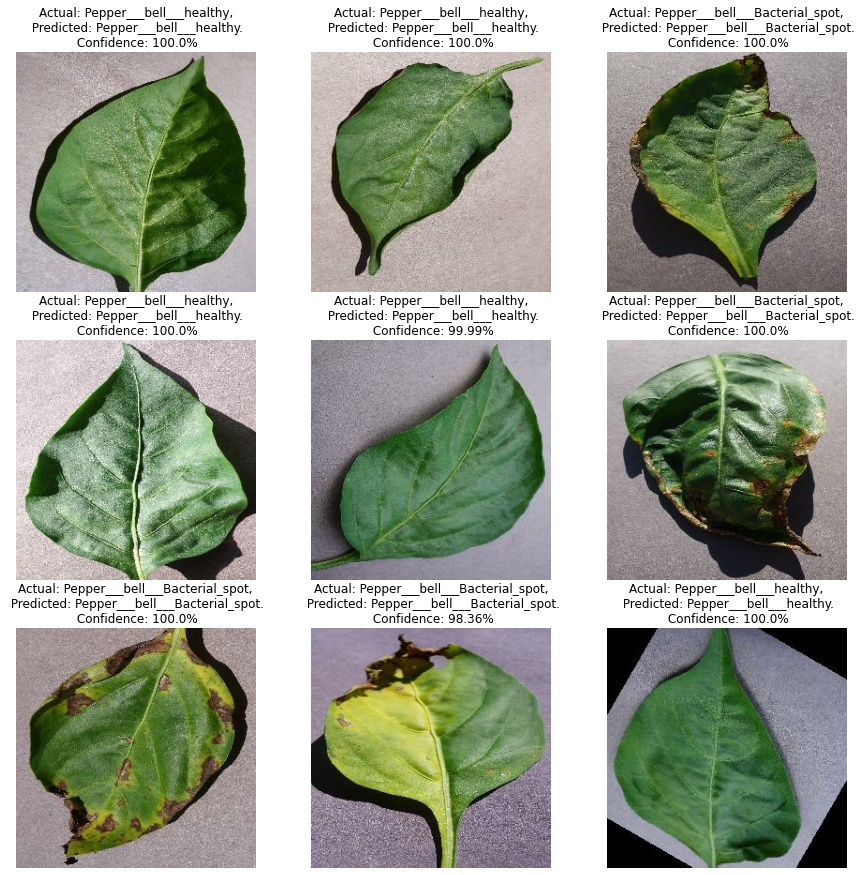

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

A figure with a size of (15,15) is created using the plt.figure() function. A for loop is used to iterate over the images and labels of the test dataset with the test_ds.take(1) method. For each image, a subplot is created using the plt.subplot() function. The image is displayed on the subplot using the plt.imshow() function.  

The predict() function is called on the current image to get the predicted class and confidence level. The actual class of the image is obtained from the labels using the class_names list.  

The title of the subplot is then set using the plt.title() function. The title displays the actual class, predicted class and the confidence level of the prediction.


Finally, the plt.axis("off") function is used to remove the axis from the subplots.  

This code snippet can be used to visualize the predictions made by the model on new images and get an idea of how well the model is working on unseen data.


**To save the trained model to disk.**

In [ ]:
model.save("D:\\Christ\\tri 5\\NN & DL\\models/Pepper.h5")

The save() method is used to save the model to disk. It takes a single argument, which is the path and filename of the model file to be saved. In this case, the model is saved to a file named "Pepper.h5" in the "../" directory.
Saving the model is important as it allows us to use the trained model later on without needing to retrain it, which can save time and computational resources. 



It also allows us to share the model with others so that they can use it as well. The .h5 file format is a widely used format for storing machine learning models, and it can be easily loaded back using the **tf.keras.models.load_model()** function.
